## RAP MUSIC GENERATION

<u><b> Step 1 : Reading the rap song file </b> </u>

In [1]:
# read the rap text file with all the raps

rap_song_file = open(r'./All_Rap_lyrics.txt','r', encoding='utf-8').read()
rap_song_file = rap_song_file.lower() # converting all the text to lower case

<u><b>  Step 2 : Building bars from lyrics </b> </u>

#### Terminologies:
##### What is a bar in rap song:
- Usually one line of lyrics is one count, and there are 4 counts in a bar.  
- There are  16 bars in a verse in most rap songs.<br>

##### An example of bar using a lyrics below:
Lights slow motion, steppin' out the Phantom ===> 1 bar <br>
All eyes on me, peekin' and glancin' ===> 2nd bar <br>
Leanin' on the wall, with b-boys dancin' ===> 3rd bar <br>
Ears, neck, and wrists lookin' like the king's ransom ==> 4 bars <br>

###### Just to note  that the verse length may vary across lyrics but we have taken the verse length to equal to 4 bars

In [2]:
# splitting out rap songs collection line by line

bars = rap_song_file.split('\n') 

<b> <u> Step 3 : Cleaning the bars </b> </u>
- Converting characters to the lowercase
- Removing empty string
- Removing special characters
- Removing characters inside [ ] as these are not relevant to the bars we are generating
- Stripping the end charcters (if its a space)

In [3]:
print('Length of the bars : ', len(bars))

Length of the bars :  22839


In [4]:
# removing the charcacters inside [] and converting the bars to lowercase

import re
print('There are characters inside [ ], these are of no significance. For example : \n\n' , bars[80:90])
new_bars = []
for bar in bars:
    bar = re.sub(r'\[.*?\]', '', bar)
    new_bars.append(bar.lower())
bars = new_bars


There are characters inside [ ], these are of no significance. For example : 

 ["but when i hear the beat i'm tempted to make another attempt at it...", "i'm infinite", '', "'95, '96 ('96)", 'and on and on and on (and on and on)', '', '', '', '[old school hip-hop beat tune plays in the background like a radio station]', '']


In [5]:
# We need to remove the empty_strings in bar

print(bars[80:90]) # we see that there are some empty strings in the file
bars = list(filter(None, bars)) ## filter out the strings with None

["but when i hear the beat i'm tempted to make another attempt at it...", "i'm infinite", '', "'95, '96 ('96)", 'and on and on and on (and on and on)', '', '', '', '', '']


In [6]:
bars[80:90] # empty string have been removed

['this is mc proof',
 'and dj head',
 "checkin' in on w.e.g.o.",
 "you know what i'm sayin'?",
 'ay yo we got the number one requested song, of the day coming up next.',
 "it's a local thing wants retilin'",
 'it goes by the name of eminem',
 'and it\'s called "it\'s ok"',
 ' check it out, ',
 ' hey kyu!']

In [7]:
# Subsituting the special characters with empty space, stripping on the end of the strings

import re
new_bars = []
for bar in bars:
    bar = re.sub('[^A-Za-z\s]+', '', bar)
    new_bars.append(bar.strip())
bars = new_bars

In [8]:
bars[80:90]# special characters have been removed

['this is mc proof',
 'and dj head',
 'checkin in on wego',
 'you know what im sayin',
 'ay yo we got the number one requested song of the day coming up next',
 'its a local thing wants retilin',
 'it goes by the name of eminem',
 'and its called its ok',
 'check it out',
 'hey kyu']

In [9]:
print('Length of the bars : ', len(bars))

Length of the bars :  17505


In [10]:
with open('./cleaned_Rap.txt.txt', 'w') as f:
    for item in bars:
        f.write("%s\n" % item)

<b> <u> Step 4 : Visualizing the dataset </b> </u>

In [11]:
# creating a word cloud of the most used words in a rhyme

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
# combining all the bars into a single string to feed into the wordcloud generate function

str_bars = ''
str_bars = ' '.join(bars)
wordcloud = WordCloud().generate(str_bars)

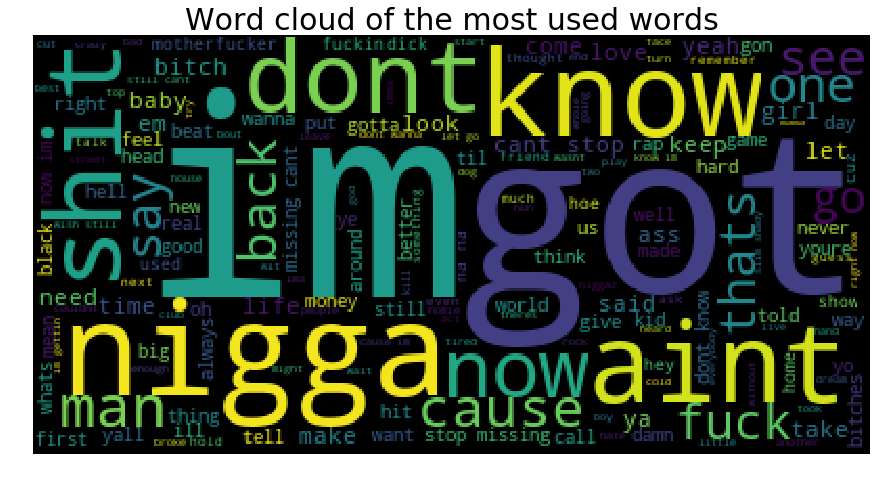

In [13]:
# forming the word cloud of the most used words in all the raps across


plt.figure(figsize=(15,100))
plt.title('Word cloud of the most used words', fontsize=30)
plt.imshow(wordcloud)
plt.axis("off") # added to not display the x and y axis
plt.show()

Text(0, 0.5, 'Number of songs')

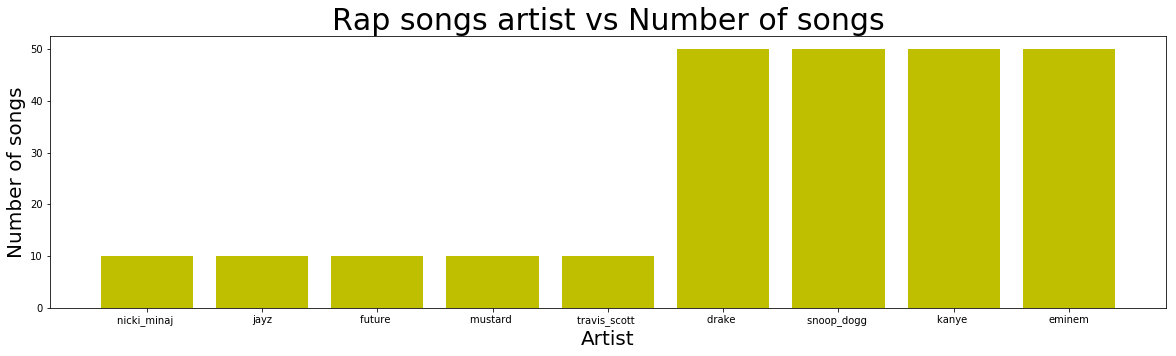

In [14]:
# visualizing artist and number of songs considered

import pandas as pd
df_artists = pd.read_excel(r'Rap_songs_artist.xlsx')

plt.figure(figsize=(20,5))
plt.title('Rap songs artist vs Number of songs', fontsize=30)
plt.bar(df_artists['Artist'],df_artists['Songs'], color= 'y')
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Number of songs', fontsize=20)

In [15]:
# counting the number and also count of unique words in the corpus

from nltk.tokenize import word_tokenize
words_count = word_tokenize(str_bars)

In [16]:
print('All the words in the bars : ' , len(words_count))
print('All the unique words in the bars : ' , len(set(words_count)))
print('The total number of bar : ', len(bars))

All the words in the bars :  145597
All the unique words in the bars :  10626
The total number of bar :  17505


<b> <u> Step 5 : Building the list of rhymes </b> </u>

In [17]:
import pronouncing #using this library to find the list of rhyming words

<b> Function : rhyming_list_all </b> <br>

- Firstly we take out the last word from every bar <br>
<br>
- pronouncing.rhymes(last_word) :  It is used to give the set of rhyming words with the last word. 
<br> For example: pronouncing.rhymes('love') will give ['above', 'belove', 'deneuve', 'deneuve', 'dove', 'glove', 'gov', 'labov', 'labove', "o'glove", 'of', 'shove', 'thereof','vanhove'] <br>
<br>
- Then we consider the last 2 characters in every rhyming word and see that which 2 charcater are the most repeated. 
<br>
- After this we assign these words rhyming_list_final in reveresed order (reversing with arrange the words with the same sound together) <br>
<br>

In [18]:
def rhyming_list_all(bars):
    rhyme_list_all = []
    rhyming_list_final = []
    for bar in bars:
        # taking the last word in each bar
        last_word = re.sub(r"\W+", '', bar.split(" ")[-1]).lower()
        # finding the rhyming word for 'last_word'
        #print(last_word)
        rhyming_words = pronouncing.rhymes(last_word)
        #rhyming_words = [x.encode('UTF8') for x in rhyming_words]
        #print(rhyming_words)
        rhyming_words_ending = []
        for rhyming_word in rhyming_words:
            rhyming_words_ending.append(rhyming_word[-2:]) # this will pull the last 2 characters from each rhyming word
        #print(rhyming_words_ending)
        # now we see that which of the 2 characters in the rhyming_words_ending list occur the most
        # we used a try catch that if the rhyming word is not found then we will take the last 2 characters of the original word
        try:
            rhyming_words_ending_most_common = max(set(rhyming_words_ending), key = rhyming_words_ending.count)
        except Exception:
            rhyming_words_ending_most_common = last_word[-2:]
            #print(rhyming_words_ending_most_common)
        rhyme_list_all.append(rhyming_words_ending_most_common)
        #print(rhyme_list_all)
    # now taking the set of the list to get only unique last 2 characters
    #print('for loop ended')
    rhyme_list_all = list(set(rhyme_list_all))
    reverse_list = [x[::-1] for x in rhyme_list_all] #  using slicing syntax to reverse the letters[start,stop,step],
    #print(reverse_list)
    reverse_list = sorted(reverse_list)# sorting the characters
    #print(reverse_list)
    # now we will reverse the string again : this is done so that the words with the similar sounds can be taken in order
    rhyming_list_final =  [x[::-1] for x in reverse_list]
    return rhyming_list_final

In [19]:
rhyming_list_final = rhyming_list_all(bars) # contain the list of all common rhyming words (last 2 characters) used in the lyrics across all bars

In [20]:
print(len(rhyming_list_final)) # lenth of the common rhyming words used in the lyrics across all bars
print(rhyming_list_final)

285
['', "s'", 'a', 'aa', 'ba', 'ca', 'da', 'ea', 'ga', 'ha', 'ia', 'ja', 'ka', 'la', 'ma', 'na', 'pa', 'ra', 'sa', 'ta', 'ua', 'va', 'ya', 'za', 'ab', 'eb', 'ib', 'ob', 'rb', 'ub', 'ac', 'bc', 'fc', 'gc', 'ic', 'mc', 'nc', 'oc', 'ad', 'ed', 'id', 'ld', 'nd', 'od', 'rd', 'ud', 'vd', 'be', 'ce', 'de', 'ee', 'fe', 'ge', 'he', 'ie', 'ke', 'le', 'me', 'ne', 'oe', 'pe', 're', 'se', 'te', 'ue', 've', 'ye', 'ze', 'af', 'ef', 'ff', 'if', 'lf', 'of', 'tf', 'ag', 'bg', 'eg', 'gg', 'ig', 'ng', 'og', 'pg', 'rg', 'ug', 'wg', 'ah', 'ch', 'eh', 'gh', 'hh', 'nh', 'oh', 'ph', 'sh', 'th', 'uh', 'wh', 'ai', 'ci', 'gi', 'hi', 'ii', 'ki', 'li', 'mi', 'ni', 'oi', 'pi', 'ri', 'si', 'ti', 'zi', 'pj', 'tj', 'ak', 'ck', 'ek', 'ik', 'kk', 'lk', 'nk', 'ok', 'rk', 'sk', 'al', 'el', 'hl', 'il', 'll', 'ol', 'rl', 'tl', 'ul', 'wl', 'xl', 'am', 'bm', 'em', 'im', 'lm', 'mm', 'om', 'rm', 'sm', 'um', 'an', 'en', 'gn', 'in', 'mn', 'nn', 'on', 'rn', 'un', 'wn', 'yn', 'ao', 'co', 'do', 'eo', 'fo', 'go', 'io', 'jo', 'ko', 'l

### What is a syllables:
- A syllable is a single, unbroken sound of a spoken (or written) word. Syllables usually contain a vowel and accompanying consonants <br>  
- EXAMPLE: Water has two syllables (wa / ter), Computer has three syllables (com / pu / ter)<br>

### why do we need syllables in rap song?:
- Counting syllables is an excellent skill <br>
- Important part of the structure of your rhymes is syllable structure<br>
- The syllables in each line will create a beat in your rap<br>
- Generally, by drawing out a line with too many syllables, or making a line too short with too few syllables, you can disrupt the beat of your rap<br>
- Avoid this by trying to balance rhyming lines to have the same number of beats<br>

### To note: 
- We are considering the maximun number of syllables for out rap song to be 16 in a line

<b> <u> Step 6 : We will count the syallables in a sentence  </b> </u>

In [21]:
import syllables
def find_syllables_count(bar):
    return syllables.estimate(bar)/16 # average syllables count in a bar

<b> <u>Step 7: we would convert the index of our rhyming 2 character into float value</b> </u>

In [22]:

# we are doing the following steps to see that how close the rhyming words are each other
# This will make the last words which are similar in rhyme to get closer scores

def index_rhyming_word_to_float(rhyming_list_final, bar):
    word = re.sub(r"\W+", '', bar.split(" ")[-1]).lower()
    rhymeslist = pronouncing.rhymes(word)
    #rhymeslist = [x.encode('UTF8') for x in rhymeslist]
    rhymeslistends = []
    for i in rhymeslist:
        rhymeslistends.append(i[-2:])
    try:
        rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
    except Exception:
        rhymescheme = word[-2:]
    #print(len(rhymescheme))
    try:
        float_rhyme = rhyming_list_final.index(rhymescheme)
        float_rhyme = float_rhyme / float(len(rhyming_list_final))
        #print(word, float_rhyme)
        return float_rhyme
    except Exception:
        #print(word, float_rhyme)
        return None

<b> <u>Step 8 : combining the list of bars, syllables and float_rhyme_bar_list to a list</b> </u>

In [23]:
data_set = []
values_data_set = []
for bar in bars:
    values_data_set = [bar, find_syllables_count(bar), index_rhyming_word_to_float(rhyming_list_final, bar)]
    data_set.append(values_data_set)

In [24]:
len(data_set)

17505

In [25]:
len(data_set)/4

4376.25

### What is a verse:
- Writing arranged with a metrical rhythm, typically having a rhyme <br>

### why do we need verse in rap song?:
- Verses are an important componenent of any song <br>
- The duration is usually 16 bars, but the verse may last 8 bars, 12 bars, or 24 bars.<br>
- As seen from the above patten, we will consider a verse of length 4<br>

##### Since our dataset is of the length 17505, if we divide it by 4, we would get a decimal number (4376.25), so we will round it off to a whole number by substracting 1 bars and then diving it by 4

In [26]:
new_length_data_set = len(data_set) -1
new_length_data_set/4

4376.0

 <b> <u> Step 9 : creating the X and y for the lstm model </b> </u>

In [27]:
import numpy as np
X = []
y = []
i = 0
for data in range(new_length_data_set - 8):
    
    # this would create feature and labels as follows:
    # for example: if features ==> line 1, line 2, then labels ==> line 3, line 4
    # if features ==>  line 2, line 3, then labels ==> line4, line 5
    
    bar_1 = data_set[data][1:]
    bar_2 = data_set[data + 1][1:]
    bar_3 = data_set[data + 2][1:]
    bar_4 = data_set[data + 3][1:]
    #bar_5 = data_set[data + 4][1:]
    #bar_6 = data_set[data + 5][1:]
    #bar_7 = data_set[data + 6][1:]
    #bar_8 = data_set[data + 7][1:]        

    #print(bar_1, bar_2, bar_3, bar_4)
    #feature = [bar_1[0], bar_1[1], bar_2[0], bar_2[1], bar_3[0], bar_3[1], bar_4[0], bar_4[1]]
    feature = [bar_1[0], bar_1[1], bar_2[0], bar_2[1]]
    label = [bar_3[0], bar_3[1], bar_4[0], bar_4[1]]
    #label = [bar_5[0], bar_5[1], bar_6[0], bar_6[1],bar_7[0], bar_7[1], bar_8[0], bar_8[1]]
    #print(feature)
    #print(label)
    feature = np.array(feature)
    label = np.array(label)
    #print(feature)
    #print(label)   
    feature = feature.reshape(2,2)
    label = label.reshape(2,2)
    #print(feature)
    #print(label)  
    X.append(feature)
    y.append(label)
X = np.array(X)
y = np.array(y)

In [28]:
X[:100]

array([[[0.5625    , 0.75438596],
        [0.9375    , 0.75438596]],

       [[0.9375    , 0.75438596],
        [0.5       , 0.66666667]],

       [[0.5       , 0.66666667],
        [1.        , 0.18596491]],

       [[1.        , 0.18596491],
        [0.3125    , 0.28070175]],

       [[0.3125    , 0.28070175],
        [0.5       , 0.75438596]],

       [[0.5       , 0.75438596],
        [0.125     , 0.18596491]],

       [[0.125     , 0.18596491],
        [0.75      , 0.53333333]],

       [[0.75      , 0.53333333],
        [1.        , 0.53333333]],

       [[1.        , 0.53333333],
        [0.8125    , 0.53333333]],

       [[0.8125    , 0.53333333],
        [1.        , 0.54035088]],

       [[1.        , 0.54035088],
        [0.5625    , 0.73333333]],

       [[0.5625    , 0.73333333],
        [1.        , 0.73333333]],

       [[1.        , 0.73333333],
        [0.8125    , 0.75789474]],

       [[0.8125    , 0.75789474],
        [1.        , 0.75789474]],

       [[1.        ,

In [29]:
# test train split

#X_train = X[:13130]
#y_train = y[:13130] 
#X_test = X[13130:]
#y_test = y[13130:]

 <b> <u> Step 10 : LSTM Model </b> </u>

In [30]:
# step 9 : creating the lstm model for training
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense
from tensorflow.python.keras.callbacks import TensorBoard

Using TensorFlow backend.


#### LSTM parameters:
- input_shape = (2,2) ==>  Any size for a batch, time steps is 2 and number of input units is 2
- input shape is of the form (batch_size, 2, 2)
- units ==> number of output units in the LSTM
- return_sequence is True ==> Output is a 3D array (batch_size, time_steps, units)

In [31]:
from keras import backend
 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [42]:
import keras
import os
import tensorflow
import datetime
model = Sequential()
model.add(LSTM(4, input_shape = (2,2), return_sequences = True)) 
model.add(LSTM(16, return_sequences = True))
model.add(LSTM(16, return_sequences = True))
model.add(LSTM(16, return_sequences = True))
model.add(LSTM(2, return_sequences = True))
model.summary()
sgd = keras.optimizers.SGD(lr=0.001)

model.compile(optimizer = sgd , loss = 'mse', metrics=[rmse]) # the optimizer function rmsprop: optimizes the gradient descent and the the loss function: mse: "mean_squared_error 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2, 4)              112       
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 16)             1344      
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 16)             2112      
_________________________________________________________________
lstm_4 (LSTM)                (None, 2, 16)             2112      
_________________________________________________________________
lstm_5 (LSTM)                (None, 2, 2)              152       
Total params: 5,832
Trainable params: 5,832
Non-trainable params: 0
_________________________________________________________________


In [44]:
# fitting the model
history_train_with_train_25 = model.fit(np.array(X), np.array(y),epochs = 300,verbose = 1, validation_split=0.25,callbacks=[tensorflow.keras.callbacks.TensorBoard('logs')])

Train on 13122 samples, validate on 4374 samples
Epoch 1/300
13122/13122 [==============================] - 7s 571us/step - loss: 0.1482 - rmse: 0.3508 - val_loss: 0.1377 - val_rmse: 0.3409
Epoch 2/300
13122/13122 [==============================] - 4s 281us/step - loss: 0.1462 - rmse: 0.3483 - val_loss: 0.1357 - val_rmse: 0.3382
Epoch 3/300
13122/13122 [==============================] - 4s 324us/step - loss: 0.1442 - rmse: 0.3458 - val_loss: 0.1338 - val_rmse: 0.3356
Epoch 4/300
13122/13122 [==============================] - 4s 311us/step - loss: 0.1423 - rmse: 0.3434 - val_loss: 0.1319 - val_rmse: 0.3331
Epoch 5/300
13122/13122 [==============================] - 4s 282us/step - loss: 0.1405 - rmse: 0.3411 - val_loss: 0.1301 - val_rmse: 0.3307
Epoch 6/300
13122/13122 [==============================] - 4s 286us/step - loss: 0.1387 - rmse: 0.3388 - val_loss: 0.1283 - val_rmse: 0.3283
Epoch 7/300
13122/13122 [==============================] - 4s 289us/step - loss: 0.1370 - rmse: 0.3366 - 

13122/13122 [==============================] - 4s 293us/step - loss: 0.0937 - rmse: 0.2786 - val_loss: 0.0838 - val_rmse: 0.2646
Epoch 59/300
13122/13122 [==============================] - 4s 308us/step - loss: 0.0934 - rmse: 0.2781 - val_loss: 0.0835 - val_rmse: 0.2641
Epoch 60/300
13122/13122 [==============================] - 6s 442us/step - loss: 0.0930 - rmse: 0.2776 - val_loss: 0.0832 - val_rmse: 0.2636
Epoch 61/300
13122/13122 [==============================] - 4s 303us/step - loss: 0.0927 - rmse: 0.2772 - val_loss: 0.0829 - val_rmse: 0.2631
Epoch 62/300
13122/13122 [==============================] - 4s 329us/step - loss: 0.0924 - rmse: 0.2767 - val_loss: 0.0825 - val_rmse: 0.2626
Epoch 63/300
13122/13122 [==============================] - 4s 327us/step - loss: 0.0921 - rmse: 0.2763 - val_loss: 0.0822 - val_rmse: 0.2622
Epoch 64/300
13122/13122 [==============================] - 4s 305us/step - loss: 0.0918 - rmse: 0.2759 - val_loss: 0.0819 - val_rmse: 0.2617
Epoch 65/300
13122/

13122/13122 [==============================] - 4s 310us/step - loss: 0.0839 - rmse: 0.2648 - val_loss: 0.0742 - val_rmse: 0.2502
Epoch 116/300
13122/13122 [==============================] - 4s 320us/step - loss: 0.0838 - rmse: 0.2647 - val_loss: 0.0741 - val_rmse: 0.2501
Epoch 117/300
13122/13122 [==============================] - 4s 304us/step - loss: 0.0838 - rmse: 0.2646 - val_loss: 0.0740 - val_rmse: 0.2500
Epoch 118/300
13122/13122 [==============================] - 4s 292us/step - loss: 0.0837 - rmse: 0.2645 - val_loss: 0.0739 - val_rmse: 0.2499
Epoch 119/300
13122/13122 [==============================] - 4s 303us/step - loss: 0.0836 - rmse: 0.2644 - val_loss: 0.0739 - val_rmse: 0.2498
Epoch 120/300
13122/13122 [==============================] - 4s 297us/step - loss: 0.0836 - rmse: 0.2643 - val_loss: 0.0738 - val_rmse: 0.2497
Epoch 121/300
13122/13122 [==============================] - 4s 295us/step - loss: 0.0835 - rmse: 0.2642 - val_loss: 0.0737 - val_rmse: 0.2496
Epoch 122/300

13122/13122 [==============================] - 5s 370us/step - loss: 0.0808 - rmse: 0.2605 - val_loss: 0.0711 - val_rmse: 0.2456
Epoch 173/300
13122/13122 [==============================] - 5s 360us/step - loss: 0.0808 - rmse: 0.2605 - val_loss: 0.0711 - val_rmse: 0.2456
Epoch 174/300
13122/13122 [==============================] - 4s 321us/step - loss: 0.0808 - rmse: 0.2604 - val_loss: 0.0711 - val_rmse: 0.2455
Epoch 175/300
13122/13122 [==============================] - 4s 334us/step - loss: 0.0807 - rmse: 0.2603 - val_loss: 0.0710 - val_rmse: 0.2455 0.0
Epoch 176/300
13122/13122 [==============================] - 5s 362us/step - loss: 0.0807 - rmse: 0.2603 - val_loss: 0.0710 - val_rmse: 0.2454
Epoch 177/300
13122/13122 [==============================] - 4s 322us/step - loss: 0.0806 - rmse: 0.2602 - val_loss: 0.0709 - val_rmse: 0.2453
Epoch 178/300
13122/13122 [==============================] - 4s 313us/step - loss: 0.0806 - rmse: 0.2602 - val_loss: 0.0709 - val_rmse: 0.2453
Epoch 179

13122/13122 [==============================] - 5s 377us/step - loss: 0.0787 - rmse: 0.2575 - val_loss: 0.0691 - val_rmse: 0.2424
Epoch 230/300
13122/13122 [==============================] - 5s 363us/step - loss: 0.0787 - rmse: 0.2574 - val_loss: 0.0690 - val_rmse: 0.2423
Epoch 231/300
13122/13122 [==============================] - 4s 317us/step - loss: 0.0787 - rmse: 0.2574 - val_loss: 0.0690 - val_rmse: 0.2423
Epoch 232/300
13122/13122 [==============================] - 4s 303us/step - loss: 0.0786 - rmse: 0.2573 - val_loss: 0.0690 - val_rmse: 0.2422
Epoch 233/300
13122/13122 [==============================] - 4s 316us/step - loss: 0.0786 - rmse: 0.2573 - val_loss: 0.0689 - val_rmse: 0.2422
Epoch 234/300
13122/13122 [==============================] - 5s 364us/step - loss: 0.0786 - rmse: 0.2572 - val_loss: 0.0689 - val_rmse: 0.2421
Epoch 235/300
13122/13122 [==============================] - 4s 331us/step - loss: 0.0785 - rmse: 0.2572 - val_loss: 0.0689 - val_rmse: 0.2421
Epoch 236/300

13122/13122 [==============================] - 5s 380us/step - loss: 0.0769 - rmse: 0.2548 - val_loss: 0.0673 - val_rmse: 0.2395
Epoch 287/300
13122/13122 [==============================] - 5s 362us/step - loss: 0.0769 - rmse: 0.2547 - val_loss: 0.0673 - val_rmse: 0.2394
Epoch 288/300
13122/13122 [==============================] - 5s 352us/step - loss: 0.0769 - rmse: 0.2547 - val_loss: 0.0672 - val_rmse: 0.2394
Epoch 289/300
13122/13122 [==============================] - 5s 381us/step - loss: 0.0768 - rmse: 0.2547 - val_loss: 0.0672 - val_rmse: 0.2393
Epoch 290/300
13122/13122 [==============================] - 5s 352us/step - loss: 0.0768 - rmse: 0.2546 - val_loss: 0.0672 - val_rmse: 0.2393
Epoch 291/300
13122/13122 [==============================] - 5s 377us/step - loss: 0.0768 - rmse: 0.2546 - val_loss: 0.0672 - val_rmse: 0.2392
Epoch 292/300
13122/13122 [==============================] - 5s 382us/step - loss: 0.0768 - rmse: 0.2545 - val_loss: 0.0671 - val_rmse: 0.2392
Epoch 293/300

In [43]:
# Load TENSORBOARD
%load_ext tensorboard.notebook
# Start TENSORBOARD
%tensorboard --logdir logs
%reload_ext tensorboard.notebook


The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook


Reusing TensorBoard on port 6006 (pid 39412), started -1 day, 23:46:10 ago. (Use '!kill 39412' to kill it.)

In [ ]:
# summarize history for loss
import matplotlib.pyplot as plt

plt.plot(history_train_with_train_25.history['loss'][:],linewidth=3)
plt.plot(history_train_with_train_25.history['val_loss'][:],linewidth=3)

plt.title('model train vs validation loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history_train_with_train_25.history['rmse'],linewidth=3)
plt.plot(history_train_with_train_25.history['val_rmse'],linewidth=3)
plt.ylabel('RMSE')
plt.xlabel('EPOCH')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
plt.show()

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

<b> <u> Step 11 : Creating new senetences using Markov chain </b> </u>

In [ ]:
# step 10 : now we will generate new lyrics using markov chain by creating a markov_text object, which would be used to make sentences later
import markovify
markov_text = markovify.NewlineText(rap_song_file)

In [ ]:
def generate_lyrics():
    bars_new_lyrics = []
    last_words = []
    lyriclength = len(bars)
    count = 0
    #markov_model = markov_text((". ").join('songs.txt') + ".")

    while len(bars_new_lyrics) < lyriclength / 9 and count < lyriclength * 2:
        # By default, the make_sentence method tries, a maximum of 10 times per invocation,
        # to make a sentence that doesn't overlap too much with the original text.
        # If it is successful, the method returns the sentence as a string.
        # If not, it returns None. (https://github.com/jsvine/markovify)
        bar = markov_text.make_sentence()
        #print(bar)
        # make sure the bar isn't 'None' and that the amount of
        # syllables is under the max syllables
        if type(bar) != type(None) and find_syllables_count(bar) < 1:

            # function to get the last word of the bar
            def get_last_word(bar):
                last_word = bar.split(" ")[-1]
                # if the last word is punctuation, get the word before it
                if last_word[-1] in "!.?,":
                    last_word = last_word[:-1]
                return last_word

            last_word = get_last_word(bar)
            # only use the bar if it is unique and the last_word
            # has only been seen less than 3 times
            if bar not in bars_new_lyrics and last_words.count(last_word) < 3:
                bars_new_lyrics.append(bar)
                last_words.append(last_word)
                count += 1

    return bars_new_lyrics

In [ ]:
bars_new_lyrics = generate_lyrics()

In [ ]:

new_bars = []
for bar in bars_new_lyrics:
    bar = re.sub('[^A-Za-z\s]+', '', bar)
    new_bars.append(bar.strip())
bars_new_lyrics = new_bars

In [ ]:
print(len(bars_new_lyrics))

#### ----------------completed-----------------------------------------

In [ ]:
rhyming_list_final_new_lyrics = rhyming_list_all(bars_new_lyrics)

In [ ]:
rhyming_list_final_new_lyrics[:10]

In [ ]:
print(len(rhyming_list_final_new_lyrics))

In [ ]:
import random
def compose_rap(lines, rhyming_list_final_new_lyrics, model):
    rap_vectors = []
    human_lyrics = bars
    
    # choose a random line to start in from given lyrics
    initial_index = random.choice(range(len(human_lyrics) - 1))
    # create an initial_lines list consisting of 2 lines
    initial_lines = human_lyrics[initial_index:initial_index + 2]
    print(initial_lines)
    #print(initial_lines)
    starting_input = []
    for line in initial_lines:
        # appends a [syllable, rhyme_index] pair to starting_input
        #print(line)
        starting_input.append([find_syllables_count(line), index_rhyming_word_to_float(rhyming_list_final_new_lyrics,line)])
    # predict generates output predictions for the given samples
    # it's reshaped as a (1, 2, 2) so that the model can predict each
    # 2x2 matrix of [syllable, rhyme_index] pairs
    print(starting_input)
    starting_vectors = model.predict(np.array([starting_input]).flatten().reshape(1, 2, 2))
    #starting_vectors = model.predict(np.array([starting_input]).flatten().reshape(2, 2, 4))
    rap_vectors.append(starting_vectors)
    #print(starting_vectors)
    for i in range(20):
        rap_vectors.append(model.predict(np.array([rap_vectors[-1]]).flatten().reshape(1, 2, 2)))
        #rap_vectors.append(model.predict(np.array([rap_vectors[-1]]).flatten().reshape(2, 2, 4)))
    return rap_vectors

In [ ]:
rap_generated_with_prediction = compose_rap(bars_new_lyrics, rhyming_list_final_new_lyrics, model)

In [ ]:
dataset_new_lyrics = []
for line in bars_new_lyrics:
    line_list = [line, find_syllables_count(line), index_rhyming_word_to_float(rhyming_list_final_new_lyrics,line)]
    dataset_new_lyrics.append(line_list)

In [ ]:
# compare the last words to see if they are the same, if they are
# increment a penalty variable which grants penalty points for being
# uncreative
def last_word_compare(rap, line2):
    penalty = 0
    for line1 in rap:
        word1 = line1.split(" ")[-1]
        word2 = line2.split(" ")[-1]

        # remove any punctuation from the words
        while word1[-1] in "?!,. ":
            word1 = word1[:-1]

        while word2[-1] in "?!,. ":
            word2 = word2[:-1]

        if word1 == word2:
            penalty += 0.2

    return penalty

# vector_half is a single [syllable, rhyme_index] pair
# returns a score rating for a given line
def calculate_score(vector_half, syllables, rhyme, penalty):
    desired_syllables = vector_half[0]
    desired_rhyme = vector_half[1]
    # desired_syllables is the number of syllables we want
    desired_syllables = desired_syllables * maxsyllables
    # desired rhyme is the index of the rhyme we want
    desired_rhyme = desired_rhyme * len(rhyming_list_final_new_lyrics)

    # generate a score by subtracting from 1 the sum of the difference between
    # predicted syllables and generated syllables and the difference between
    # the predicted rhyme and generated rhyme and then subtract the penalty
    score = 1.0 - (abs((float(desired_syllables) - float(syllables))) + abs(
        (float(desired_rhyme) - float(rhyme)))) - penalty

    return score


In [ ]:
def song_generation(rap_generated_with_prediction, bars_new_lyrics, rhyming_list_final_new_lyrics):
    print ("\n\n")
    print("RAP GENERATED")
    print ("\n\n")

    # generated a list of all the lines from generated_lyrics with their
    # line, syllables, and rhyme float value
    rap = []
    rap_bars = []
    for raps in rap_generated_with_prediction:
        # vectors are the 2x2 rap_vectors (predicted bars) generated by compose_rap()
        # separate every vector into a half (essentially one bar) where each
        # has a pair of [syllables, rhyme_index]
        rap_bars.append(list(raps[0][0]))
        rap_bars.append(list(raps[0][1]))
    print(rap_bars) # predictions are subdivided into an array of [syllable and rhyming index pair]
    for rap_bar in rap_bars:
        # Each vector (predicted bars) is scored against every generated bar ('item' below)
        # to find the generated bar that best matches (highest score) the vector predicted
        # by the model. This bar is then added to the final rap and also removed from the
        # generated lyrics (dataset) so that we don't get duplicate lines in the final rap.
        scorelist = []
        for item in dataset_new_lyrics:
            # item is one of the generated bars from the Markov model
            line = item[0]
            print('len(rap)', rap)
            if len(rap) != 0:
                penalty = last_word_compare(rap, line)
            else:
                penalty = 0
            # calculate the score of the current line
            total_score = calculate_score(rap_bar, item[1], item[2], penalty)
            score_entry = [line, total_score]
            # add the score of the current line to a scorelist
            scorelist.append(score_entry)

        fixed_score_list = []
        for score in scorelist:
            fixed_score_list.append(float(score[1]))
        # get the line with the max valued score from the fixed_score_list
        max_score = max(fixed_score_list)
        for item in scorelist:
            if item[1] == max_score:
                # append item[0] (the line) to the rap
                rap.append(item[0])
                print(str(item[0]))

                # remove the line we added to the rap so
                # it doesn't get chosen again
                for i in dataset_new_lyrics:
                    if item[0] == i[0]:
                        dataset_new_lyrics.remove(i)
                        break
                break
    return rap


In [ ]:
song_generation(rap_generated_with_prediction, bars_new_lyrics, rhyming_list_final_new_lyrics)